In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
# os.listdir()
# glob.glob("*.jpg")

img = cv2.imread("IMG_20200119_062202.jpg", cv2.IMREAD_GRAYSCALE)

The shape of this image is (3024, 4032)


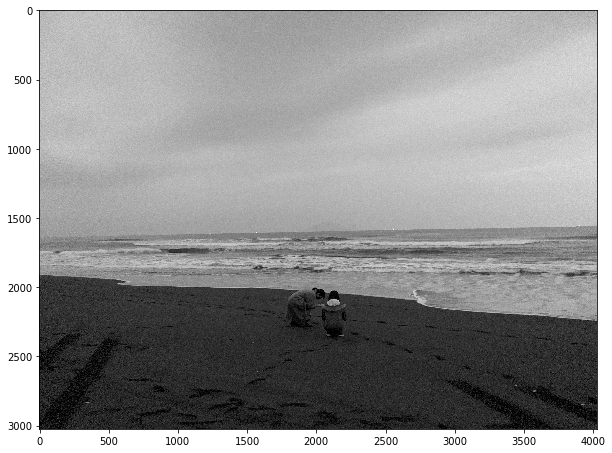

In [3]:
print("The shape of this image is {}".format(img.shape))
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap="gray")

In [4]:
def salt_and_pepper(image, p):
    shape = image.shape
    img_sz = shape[0] * shape[1]
    noise_sz = np.int(img_sz * p)
    
    # sample random noise
    noise = np.random.randint(img_sz, size=noise_sz)
    salt_or_pepper = np.random.randint(2, size=noise_sz) * 255
#     saltOnly = np.repeat(255, noise_sz)
    x = noise % img.shape[0]
    y = noise // img.shape[0]
    
    new_img = image.copy()
    new_img[x, y] = salt_or_pepper
#     new_img[x, y] = saltOnly
    
    return new_img

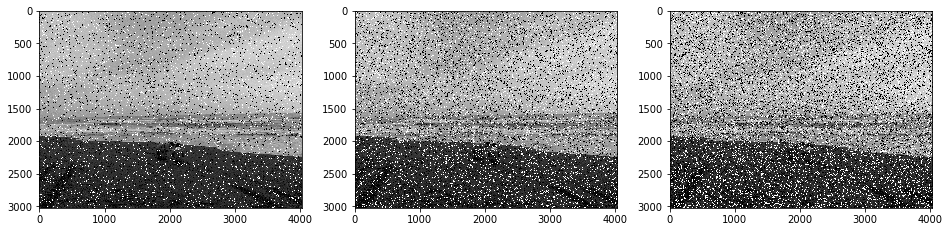

In [5]:
img10 = salt_and_pepper(img, .1)
img20 = salt_and_pepper(img, .2)
img30 = salt_and_pepper(img, .3)

plt.figure(figsize=(16, 16))
plt.subplot(1, 3, 1)
plt.imshow(img10, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(img20, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(img30, cmap="gray")

In [6]:
def filters(arr, method):
    if method == "smooth":
        return np.round(np.sum(arr, axis=1) / arr.shape[1], 0).astype(np.int)
    elif method == "median":
        return np.median(arr, axis=1)

In [7]:
def denoise(image, mask_sz, method, pad):
    pad_sz = mask_sz // 2
    img_pad = np.pad(image, (pad_sz, pad_sz), mode=pad)
    img_pad_flat = img_pad.flatten()
    
    # find nxn mask index
    tmp_arr = np.arange(mask_sz) * img_pad.shape[1]
    mask = np.repeat(tmp_arr, mask_sz) + np.tile(range(mask_sz), mask_sz)
    
    # find index from left top of the picture
    # because of padding we use variable x to correct it
    i = np.arange(image.size) + np.repeat(range(0, 2*image.shape[0], 2), image.shape[1])
    x = np.repeat(i, mask_sz**2)
    index = np.tile(mask, img10.size) + x
    
    # put the information extract from index in row order
    kernelInfo = img_pad_flat[index]
    kernelInfo.shape = (kernelInfo.size // mask_sz**2, mask_sz**2)
    imgInfo = filters(kernelInfo, method)
    
    return np.reshape(imgInfo, image.shape)

In [8]:
def PSNR(origin, reduced):
    MSE = np.mean((origin - reduced) ** 2)
    if(MSE == 0):
        return 100
    MAX = 255
    psnr = 20 * np.log10(MAX / np.sqrt(MSE))
    return np.round(psnr, 2)

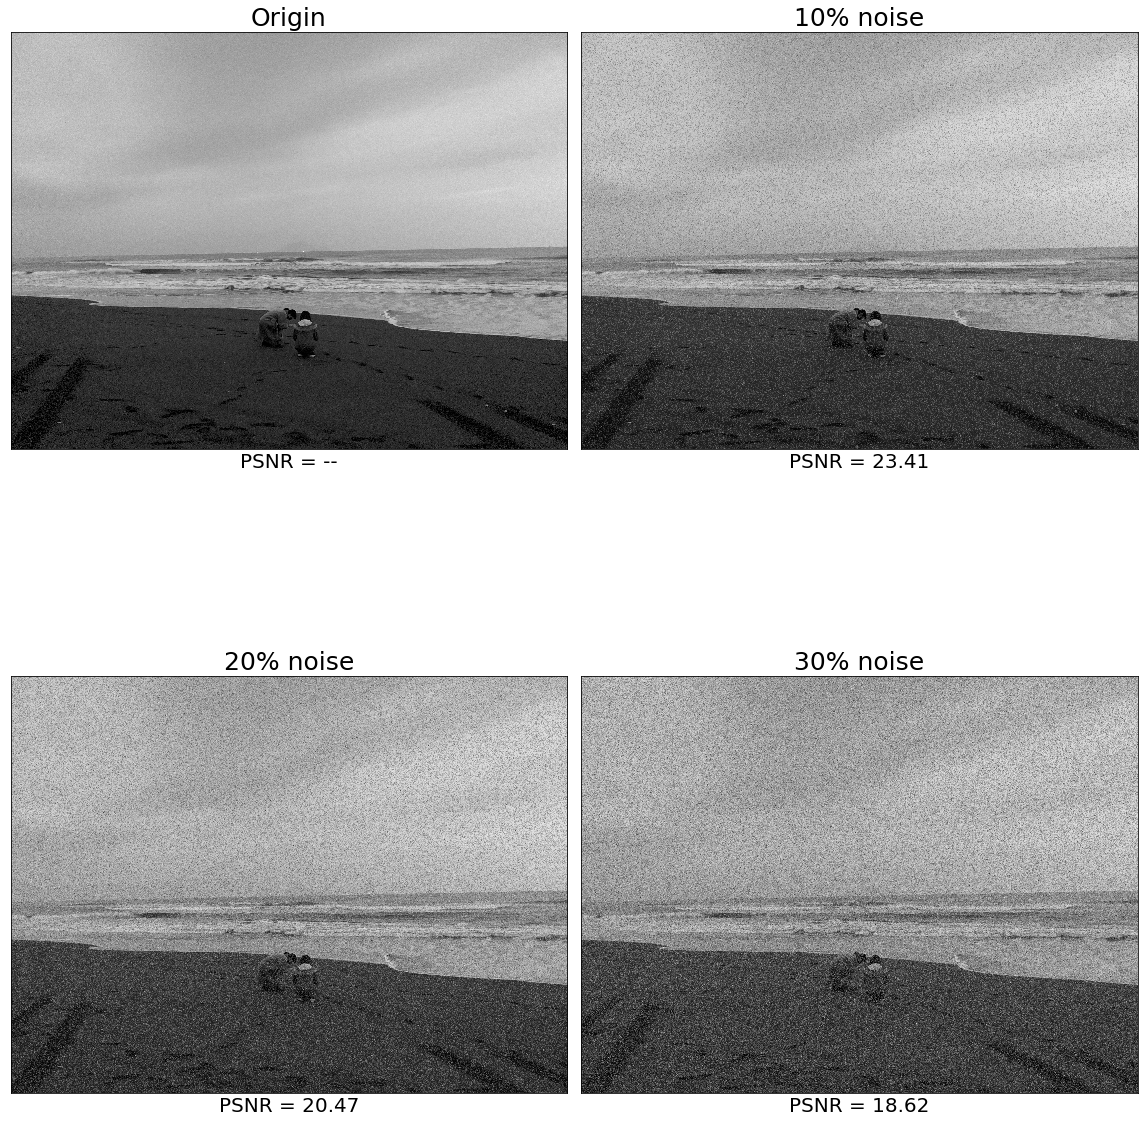

In [9]:
plt.figure(num="smoothing method", figsize=(16, 20))

plt.subplot(2, 2, 1)
plt.title("Origin", fontsize=25)
plt.xlabel(f"PSNR = --", fontsize=20)
plt.imshow(img, cmap="gray")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

img10_sm = denoise(img10, 3, "smooth", "reflect")
plt.subplot(2, 2, 2)
plt.title("10% noise", fontsize=25)
plt.xlabel(f"PSNR = {PSNR(img, img10_sm)}", fontsize=20)
plt.imshow(img10_sm, cmap="gray")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])


img20_sm = denoise(img20, 3, "smooth", "reflect")
plt.subplot(2, 2, 3)
plt.title("20% noise", fontsize=25)
plt.xlabel(f"PSNR = {PSNR(img, img20_sm)}", fontsize=20)
plt.imshow(img20_sm, cmap="gray")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

img30_sm = denoise(img30, 3, "smooth", "reflect")
plt.subplot(2, 2, 4)
plt.title("30% noise", fontsize=25)
plt.xlabel(f"PSNR = {PSNR(img, img30_sm)}", fontsize=20)
plt.imshow(img30_sm, cmap="gray")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.tight_layout()

for file in os.listdir():
    if file == "smoothMethod.png":
        break
    plt.savefig("smoothMethod.png")

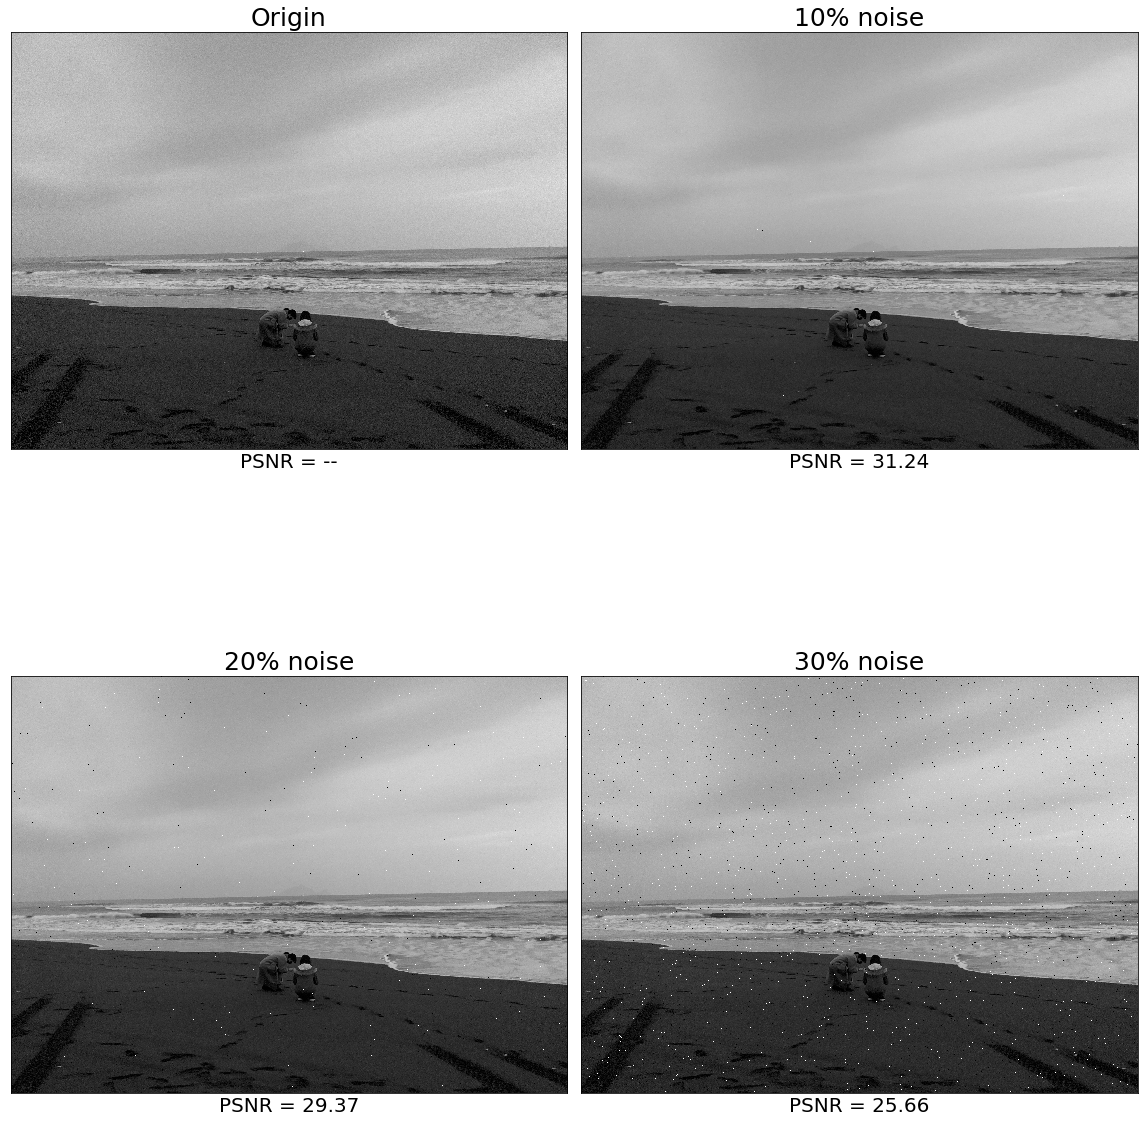

In [10]:
plt.figure(num="median filter", figsize=(16, 20))

plt.subplot(2, 2, 1)
plt.title("Origin", fontsize=25)
plt.xlabel(f"PSNR = --", fontsize=20)
plt.imshow(img, cmap="gray")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

img10_me = denoise(img10, 3, "median", "reflect")
plt.subplot(2, 2, 2)
plt.title("10% noise", fontsize=25)
plt.xlabel(f"PSNR = {PSNR(img, img10_me)}", fontsize=20)
plt.imshow(img10_me, cmap="gray")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

img20_me = denoise(img20, 3, "median", "reflect")
plt.subplot(2, 2, 3)
plt.title("20% noise", fontsize=25)
plt.xlabel(f"PSNR = {PSNR(img, img20_me)}", fontsize=20)
plt.imshow(img20_me, cmap="gray")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

img30_me = denoise(img30, 3, "median", "reflect")
plt.subplot(2, 2, 4)
plt.title("30% noise", fontsize=25)
plt.xlabel(f"PSNR = {PSNR(img, img30_me)}", fontsize=20)
plt.imshow(img30_me, cmap="gray")
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.tight_layout()

for file in os.listdir():
    if file == "medianFilter.png":
        break
    plt.savefig("medianFilter.png")